## Exercise 1 - **Car travel**

The goal of this exercise is to familiarise with:
- code structure `# Physics, # Numerics, # Time loop, # Visualisation`
- array initialisation
- `for` loop & `if` condition
- update rule
- solving ODEs

A car cruises on a straight road at given speed $\mathrm{V = 113}$ km/h for 16 hours, making a U-turn after a distance $\mathrm{L = 200}$ km. The car speed is defined as the change of position its $x$ per time $t$:
$$
V = \frac{\partial x}{\partial t}
$$

In the above derivative, $\partial x$ and $\partial t$ are considered infinitesimal - a representation it is not possible to handle within a computer (as it would require infinite amount of resources). However, we can discretise this differential equation in order to solve it numerically by transforming the infinitesimal quantities into discrete increments:
$$
V = \frac{\partial x}{\partial t} \approx \frac{\Delta x}{\Delta t} = \frac{x_{t+\Delta t}-x_t}{\Delta t}~,
$$
where $\Delta x$ and $\Delta t$ are discrete quantities. This equation can be re-organised to return an explicit solution of the position $x$ at time $t+\Delta t$:
$$
x_{t+\Delta t} = x_{t} + V \Delta t~.
$$

1. Based on this equation, your task is to setup a numerical model to predict the position of the car as function of time. In order not to start from scratch this time, you can complete the code draft below, filling in the relevant quantities in following order:

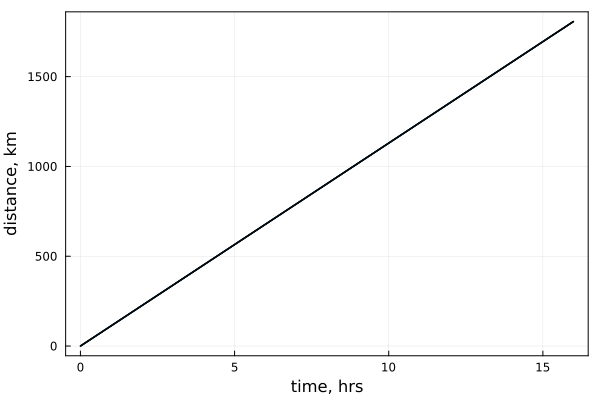

In [27]:
using Plots

@views function car_travel_1D()
    # Physical parameters
    V = 113   # speed km/h
    ttot = 16 # total time 16 h
    L = 200   # distance limit 200 m
    
    # Numerical parameters
    dt = 0.01 # timestep
    nt = Int(cld(ttot, dt))

    # Array initialisation
    T = Array{Float64}(undef, nt)
    X = Array{Float64}(undef, nt)

    T[1] = 0
    X[1] = 0

    # Time loop
    for i=2:nt
        T[i] = T[i-1] + dt
        X[i] = X[i-1] + V * dt  # updating the position using formula
    end

    # Visualisation
    display(scatter(T, X, markersize=0.5,
    xlabel="time, hrs", ylabel="distance, km",
    framestyle=:box, legend=:none))

    return
end

car_travel_1D()

2. Implement a condition to allow you doing U-turns whenever you reach the position $x=0$ or $x=200$.

The sample code you can use to get started looks like:

In [60]:
using Plots

@views function car_travel_1D(dt::R) where R <: Real
    # Physical parameters
    V = 113   # speed km/h
    ttot = 16 # total time 16 h
    L = 200   # distance limit 200 m

    # Numerical parameters
    # dt    = 0.1            # time step, h   -   varying from 0.01 to 0.1
    nt    = Int(cld(ttot, dt))  # number of time steps
   
    # Array initialisation
    T = Array{Float64}(undef, nt)
    X = Array{Float64}(undef, nt)

    T[1] = 0.
    X[1] = 0.
    
    # Time loop
    for i = 2:nt
        T[i] = T[i-1] + dt
        X[i] = X[i-1] + V * dt  # move the car
        if X[i] > L
            V = -V    # if beyond L, go back (left)

        elseif X[i] < 0
            V = -V    # if beyond 0, go back (right)
            end
    end

    # Visualisation
    display(scatter(T, X, markersize=5,
                    xlabel="time, hrs", ylabel="distance, km", title="Time step dt = " ; string(dt),
                    framestyle=:box, legend=:none))
    return
end



car_travel_1D (generic function with 2 methods)

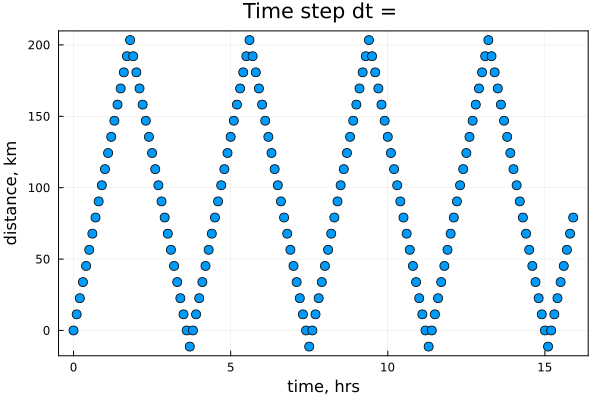

In [61]:
car_travel_1D(0.1)

Note that you can extend the first code (from step 1) to include the U-turns and use your final code to reply to the question.

### Question 1

Once the code is running, test various time step increments `0.1 < dt < 1.0` and briefly comment on your findings.

### Answer 1

_1. Adding constraints for U-turn makes a big difference_

**Before:**
We can read from the slope of the plotted position function that the speed of the car is constant

**After:**
We observed the spike-like patterns indicating the U-turn caused by the change of direction at each $x=0$ and $x=200$


_2. Changing size of the timesteps_

For sake of the simplicity, we manually changed the timestep argument ranging from 0.1 to 1.0.

In [51]:
car_travel_1D(0.1)
car_travel_1D(0.2)

MethodError: MethodError: no method matching +(::String, ::String)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:591
  +(!Matched::ChainRulesCore.AbstractThunk, ::Any) at ~/.julia/packages/ChainRulesCore/C73ay/src/tangent_arithmetic.jl:122
  +(!Matched::ChainRulesCore.Tangent{P}, ::P) where P at ~/.julia/packages/ChainRulesCore/C73ay/src/tangent_arithmetic.jl:146
  ...